### Questão 3:
Resolver 10 problemas de otimização multivariável sem restrições, obtidos do site [Test functions for optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization) ou de outras fontes (dadas as referências), usando 5 métodos de otimização e compará-los usando as 4 métricas de desempenho.


In [7]:
import time
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [8]:
# F1 = Rastrigin Function
def F3(X):
    x, y = X
    A = 10
    return A*2 + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))

# F2 = Ackley Function
def F4(X):
    x, y = X
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20

# F3 = Sphere Function
def F1(X):
    x, y = X
    return x**2 + y**2

# F4 = Rosenbrock Function
def F2(X):
    x, y = X
    return 100 * (y - x**2)**2 + (1 - x)**2

# F5 = Beale Function
def F5(X):
    x, y = X
    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

# F6 = Goldstein–Price Function
def F6(X):
    x, y = X
    return (1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))

# F7 = Booth Function
def F7(X):
    x, y = X
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

# F8 = Bukin Function N.6
def F8(X):
    x, y = X
    return 100 * np.sqrt(abs(y - 0.01*x**2)) + 0.01 * abs(x + 10)

# F9 = Matyas Function
def F9(X):
    x, y = X
    return 0.26 * (x**2 + y**2) - 0.48 * x * y

# F10 = Easom Function
def F10(X):
    x, y = X
    return -np.cos(x) * np.cos(y) * np.exp(-((x - np.pi)**2 + (y - np.pi)**2))

# Global Minima Dictionary
global_minimum = {
    # Rastrigin Function
    "F1": {
        "x": [0, 0],
        "Sx": 0
    },
    # Ackley Function
    "F2": {
        "x": [0, 0],
        "Sx": 0,
    },
    # Sphere Function
    "F3": {
        "x": [0, 0],
        "Sx": 0
    },
    # Rosenbrock Function
    "F4": {
        "x": [1, 1],
        "Sx": 0
    },
    # Beale Function
    "F5": {
        "x": [3, 0.5],
        "Sx": 0
    },
    # Goldstein–Price Function
    "F6": {
        "x": [0, -1],
        "Sx": 3
    },
    # Booth Function
    "F7": {
        "x": [1, 3],
        "Sx": 0
    },
    # Bukin Function N.6
    "F8": {
        "x": [-10, 1],
        "Sx": 0
    },
    # Matyas Function
    "F9": {
        "x": [0, 0],
        "Sx": 0
    },
    # Easom Function
    "F10": {
        "x": [np.pi, np.pi],
        "Sx": -1
    },
}


In [9]:
# List of optimization methods
methods = ['nelder-mead', 'BFGS', 'CG', 'Powell', 'L-BFGS-B']

# List of test functions
functions = [F1, F2, F3, F4, F5, F6, F7, F8, F9, F10]

# Initial guess
X0 = [100, 100]

# Store results for each method and function
results = {method: [] for method in methods}

# Decorator to calculate execution time
def execution_time_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        execution_time = (end_time - start_time) * 1000  # milliseconds
        execution_time = round(execution_time, 4)
        return result, execution_time
    return wrapper

@execution_time_decorator
def execute_minimize(obj_function, method, x_init):
    result = minimize(obj_function, x_init, method=method)
    return result

# Run each method on each function
for method in methods:
    for i, func in enumerate(functions, start=1):
        R, T = execute_minimize(func, method, X0)
        results[method].append({
            'iterations': R.nit,
            'function_evaluations': R.nfev,
            'execution_time_ms': T,
            'x': R.x,
            'Sx': R.fun,
            'success': R.success
        })

In [10]:
# Initialize metrics
N = len(functions)
epsilon = 1e-8
theta = {}
chi = {}
eta = {}
xi = {}

# Compute the metrics
for method in methods:
    theta_sum = 0
    chi_sum = 0
    xi_sum = 0
    success_count = 0

    for j in range(N):
        # Calculate the best time, best function evaluations, and best solution
        T_star = min([results[m][j]['execution_time_ms'] for m in methods])
        S_star = min([results[m][j]['function_evaluations'] for m in methods])
        d_star = min([results[m][j]['Sx'] for m in methods])

        # Current method's values
        T_ij = results[method][j]['execution_time_ms']
        S_ij = results[method][j]['function_evaluations']
        d_ij = results[method][j]['Sx']

        # Calculate the sums for each metric
        theta_sum += T_star / T_ij
        chi_sum += S_star / S_ij
        xi_sum += (d_star + epsilon) / (d_ij + epsilon)

        # Count successful optimizations
        if results[method][j]['success']:
            success_count += 1

    # Final metric values for the method
    theta[method] = (100 / N) * theta_sum
    chi[method] = (100 / N) * chi_sum
    eta[method] = (100 * success_count) / N
    xi[method] = (100 / N) * xi_sum

# Display the metrics
print("Efficacy (θ):")
print(theta)
print("\nEfficiency (χ):")
print(chi)
print("\nRobustness (η):")
print(eta)
print("\nQuality (ξ):")
print(xi)


Efficacy (θ):
{'nelder-mead': 18.76232976540811, 'BFGS': 35.44956081765506, 'CG': 33.4188528378933, 'Powell': 84.36749185725441, 'L-BFGS-B': 57.81646302292506}

Efficiency (χ):
{'nelder-mead': 21.02785747197551, 'BFGS': 69.34863790556395, 'CG': 65.47989855018399, 'Powell': 56.909290220324706, 'L-BFGS-B': 77.74765598230695}

Robustness (η):
{'nelder-mead': 80.0, 'BFGS': 70.0, 'CG': 70.0, 'Powell': 100.0, 'L-BFGS-B': 90.0}

Quality (ξ):
{'nelder-mead': np.float64(77.10333486321558), 'BFGS': np.float64(60.48927764337566), 'CG': np.float64(60.34485994692239), 'Powell': np.float64(60.031139830000946), 'L-BFGS-B': np.float64(70.51274655828598)}


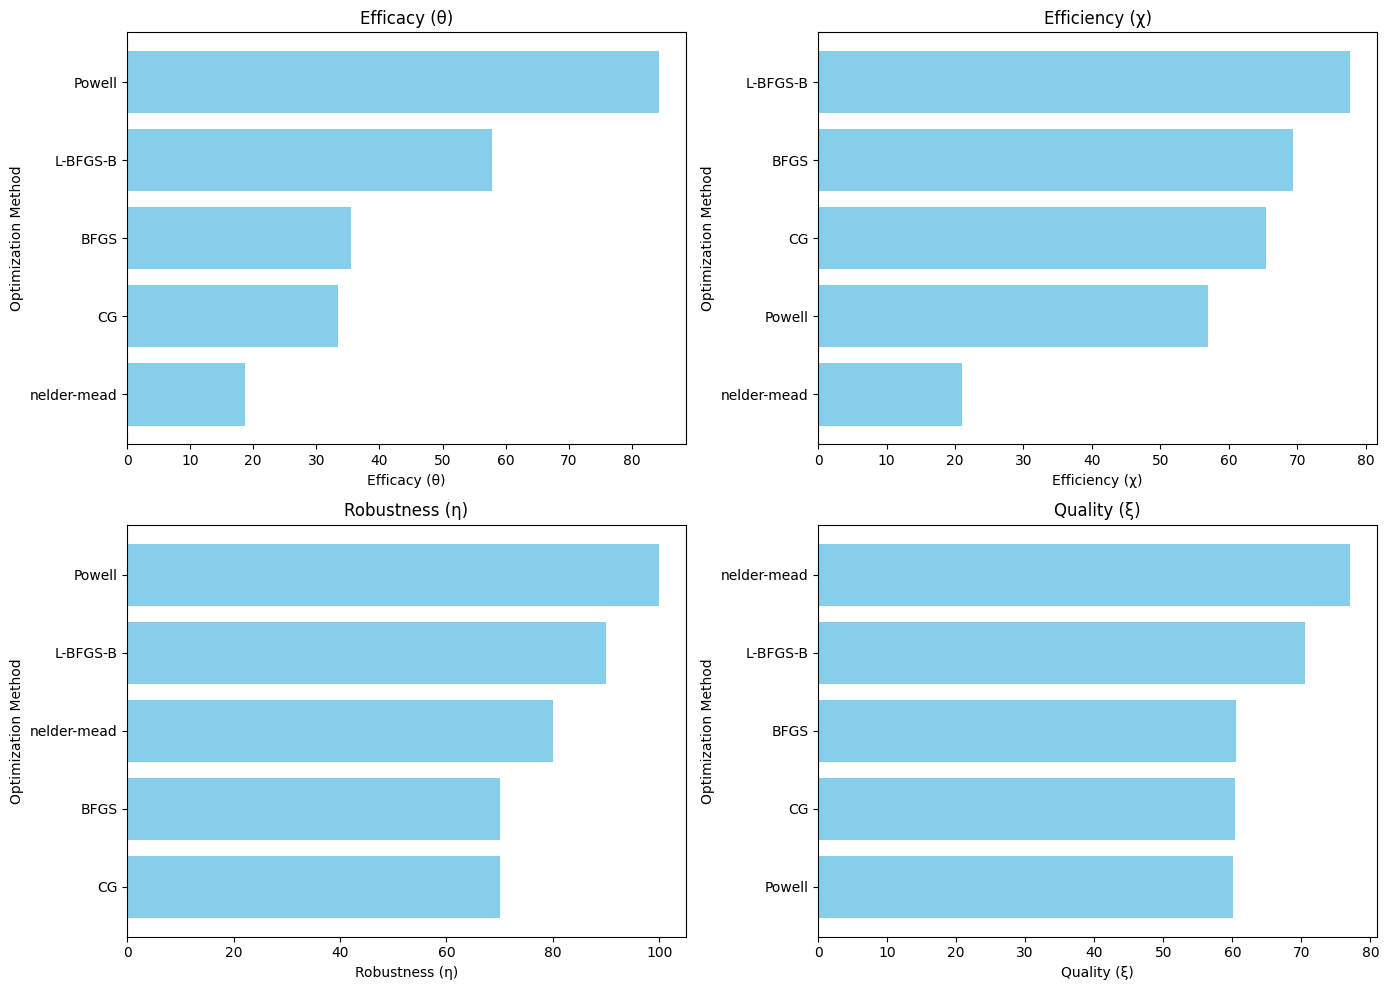

In [13]:
import matplotlib.pyplot as plt

# Sort metrics from best to worst
sorted_theta = sorted(theta.items(), key=lambda x: x[1], reverse=True)
sorted_chi = sorted(chi.items(), key=lambda x: x[1], reverse=True)
sorted_eta = sorted(eta.items(), key=lambda x: x[1], reverse=True)
sorted_xi = sorted(xi.items(), key=lambda x: x[1], reverse=True)

# Function to plot a metric
def plot_metric(ax, sorted_metric, metric_name):
    methods = [item[0] for item in sorted_metric]
    values = [item[1] for item in sorted_metric]

    ax.barh(methods, values, color='skyblue')
    ax.set_xlabel(metric_name)
    ax.set_ylabel('Optimization Method')
    ax.set_title(f'{metric_name}')
    ax.invert_yaxis()  # Invert y-axis to have the best method at the top

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot each metric in a subplot
plot_metric(axs[0, 0], sorted_theta, 'Efficacy (θ)')
plot_metric(axs[0, 1], sorted_chi, 'Efficiency (χ)')
plot_metric(axs[1, 0], sorted_eta, 'Robustness (η)')
plot_metric(axs[1, 1], sorted_xi, 'Quality (ξ)')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


